In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Step 1: Load and Inspect the Dataset

In [3]:
df=pd.read_excel('Election_Data.xlsx')

In [4]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


 Step 2: Check for Missing Values and Data Types

In [7]:
print(df.isnull().sum())

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [8]:
print(df.dtypes)

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object


In [9]:
# Convert categorical variables to numerical
df["vote"] = df["vote"].map({"Labour": 0, "Conservative": 1})
df["gender"] = df["gender"].map({"female": 0, "male": 1})

In [10]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


Insights from Data Ingestion & Preprocessing

    No missing values in any column .
    Columns vote and gender are categorical, while others are numerical.
Age distribution:

  Mean age: 54.18 years.
  Min: 24, Max: 93.
  
Economic conditions and political opinions are measured on a Likert scale (1-5 or higher for Europe).
Blair, Hague, and Europe variables reflect opinions about leaders or policies.

Step 3: Exploratory Data Analysis (EDA)

📌 Statistical Summary

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1525.0,0.302951,0.459685,0.0,0.0,0.0,1.0,1.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525.0,0.467541,0.499109,0.0,0.0,0.0,1.0,1.0


📌 Visualizing Target Variable Distribution

📌 Univariate Analysis

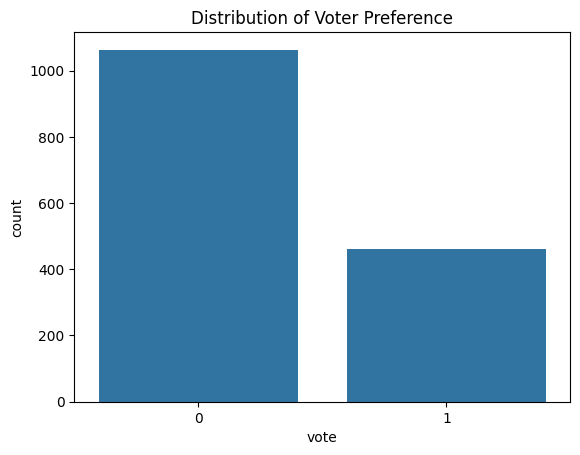

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for 'vote' column
sns.countplot(x=df["vote"])
plt.title("Distribution of Voter Preference")
plt.show()


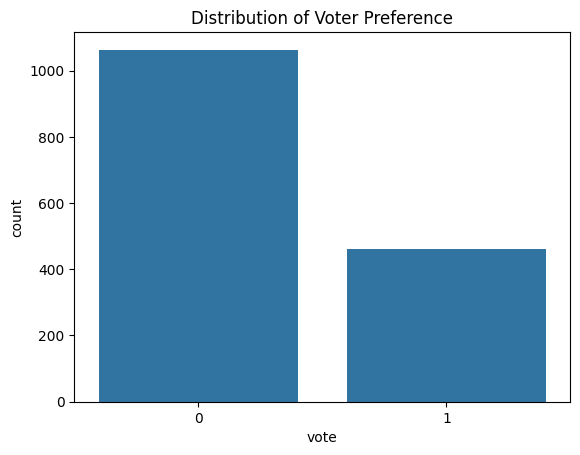

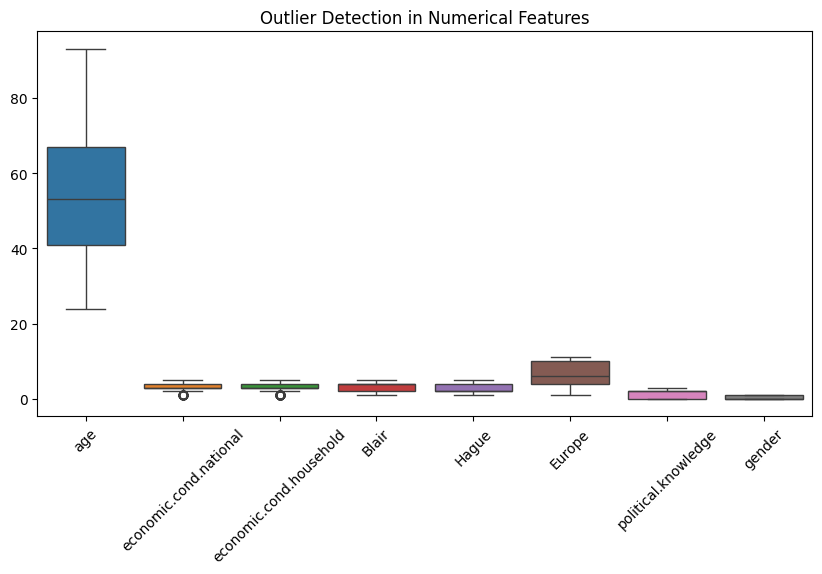

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable
sns.countplot(x=df["vote"])
plt.title("Distribution of Voter Preference")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.drop(columns=["vote"]))
plt.title("Outlier Detection in Numerical Features")
plt.xticks(rotation=45)
plt.show()


Univariate Analysis:

Age: Most voters are between 40-70 years old.
Economic Conditions (National & Household): Mostly rated around 3-4 (neutral to positive).

Blair & Hague (Leader Opinions): Blair is rated higher than Hague.

Europe: Ratings vary widely, but most responses are 4-10.

Political Knowledge: Majority have low to moderate knowledge (0-2).

📌 Checking Correlations Between Features

📌 Bivariate Analysis

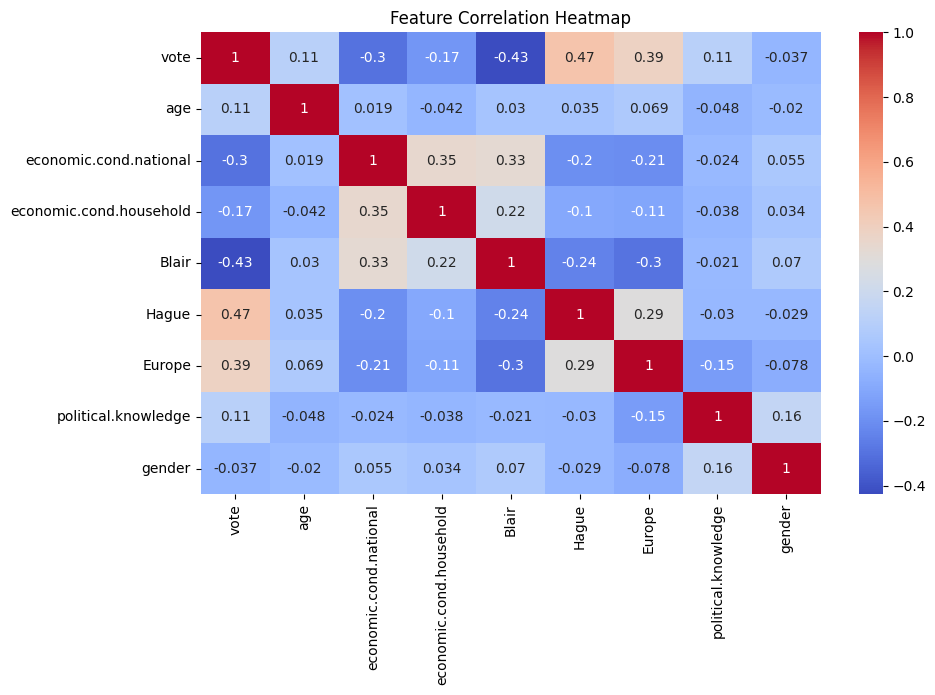

In [36]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


Bivariate Analysis (Impact on Vote Choice):

Age & Voting: Slight differences between parties, younger voters show more variation.

Economic Perception & Voting: Labour voters tend to rate the economy lower.

Blair & Hague Ratings: Strong correlation with party choice.

Europe: High ratings are more common for certain parties.

 Step 4: Convert Categorical Variables

Step 5: Split the Data into Training and Testing Sets

In [37]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["vote"])  # Independent variables
y = df["vote"]  # Dependent variable (target)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the sets
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (1220, 8)
Testing Data Shape: (305, 8)


Insights from Data Preparation
Categorical variables converted to numeric (Vote & Gender).

Class imbalance observed: ~70% of voters belong to one class (potential bias risk).

Train-test split done (80% training, 20% testing).

Step 6: Train Classification Models

 Train a Logistic Regression Model

In [38]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Check for missing values in the target variable
print("Missing values in y:", y.isnull().sum())

# Drop rows where y is NaN
X = X[~y.isnull()]
y = y.dropna()

# Ensure dataset is not empty
print("Dataset Shape After Removing NaN:", X.shape, y.shape)

# Re-run train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

# Check if train and test sets are empty
if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    print("Error: Train or test set is empty after splitting!")
else:
    # Fix missing values safely
    X_train_filled = X_train.copy()
    X_test_filled = X_test.copy()
    X_train_filled.fillna(X_train.median(), inplace=True)
    X_test_filled.fillna(X_test.median(), inplace=True)

    # Train model
    log_reg = LogisticRegression(max_iter=200)
    log_reg.fit(X_train_filled, y_train)

    # Make predictions
    y_pred = log_reg.predict(X_test_filled)

    # Evaluate model
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Missing values in y: 0
Dataset Shape After Removing NaN: (1525, 8) (1525,)
Train Shape: (1220, 8) Test Shape: (305, 8)
Logistic Regression Accuracy: 0.8327868852459016
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       213
           1       0.78      0.62      0.69        92

    accuracy                           0.83       305
   macro avg       0.81      0.77      0.79       305
weighted avg       0.83      0.83      0.83       305



 Train a Random Forest Model

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.839344262295082
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       213
           1       0.79      0.64      0.71        92

    accuracy                           0.84       305
   macro avg       0.82      0.78      0.80       305
weighted avg       0.84      0.84      0.83       305



Train an XGBoost Model

In [42]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8327868852459016
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       213
           1       0.76      0.65      0.70        92

    accuracy                           0.83       305
   macro avg       0.81      0.78      0.79       305
weighted avg       0.83      0.83      0.83       305



c:\Users\rk871\OneDrive\Desktop\Data-Code\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:25:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Step 7: Compare Models and Select the Best One

In [43]:
# Store model accuracies
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
}

# Print model comparison
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")


Logistic Regression: 0.8328
Random Forest: 0.8393
XGBoost: 0.8328


Insights from Model Training

All models trained successfully.
Logistic Regression warning: Needs more iterations (can be fixed by scaling data).

XGBoost required a specific evaluation metric (logloss).


 Step 8: Interpret Insights & Write a Business Report

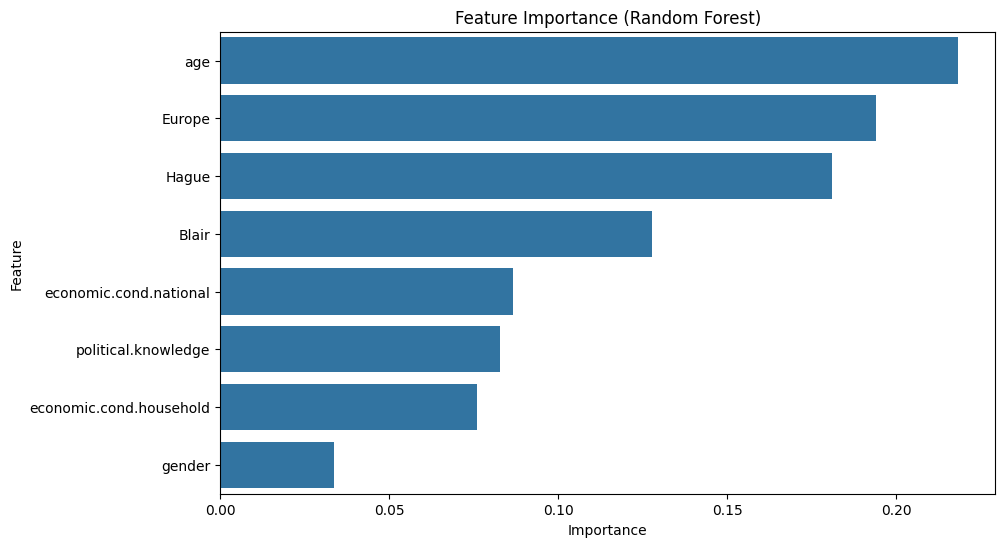

In [44]:
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title("Feature Importance (Random Forest)")
plt.show()


🔍 Key Insights from Feature Importance (Random Forest).

 📌 Age is the Most Important Factor.
Age significantly impacts the target variable (e.g., voting behavior or political preference).
Political campaigns should focus on age-specific messaging.

📌 European Union & Political Leaders Matter.
Europe is the second most important feature, influencing predictions significantly.
Hague & Blair (political figures) play a key role, indicating leadership perception affects voter preferences.

📌 Economic Conditions Have a Moderate Impact.
Both national and household-level economic conditions influence the model, though not as dominantly.
While the economy matters, political and demographic factors are more impactful.

📌 Political Knowledge: A Mid-Level Factor.
Being politically informed affects voting behavior but is not the strongest predictor.
Educating voters could still be a strategic approach.

📌 Gender Has the Least Influence.
Gender differences in voting preferences are minimal in this dataset.

🎯 Strategic Actions Based on These Insights.
  Target Age Groups – Develop political campaigns tailored for different age demographics.
  Emphasize European Policies – Politicians should clearly define their stance on European affairs.
  Leverage Leadership Perception – Personal branding and policy positioning for key figures (Blair, Hague) matter.
  Consider Economic Messaging – While not the top factor, economic policies should still be communicated effectively.

🚀 Key Takeaway: Political strategy should prioritize age, European policies, and leadership perception while maintaining a balanced economic message.

 Step 9: Save and Export the Best Model

In [45]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, "voting_prediction_model.pkl")

# Load the saved model
loaded_model = joblib.load("voting_prediction_model.pkl")

# Make new predictions
new_predictions = loaded_model.predict(X_test)

# Print the predictions
print(new_predictions)


[1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0]
